In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0,0.5,'Magnitud')

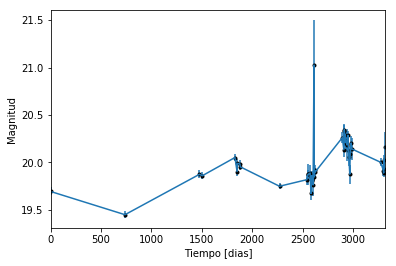

In [2]:
data = np.genfromtxt('LC_22611_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

ValueError: maxlags must be None or strictly positive < 50

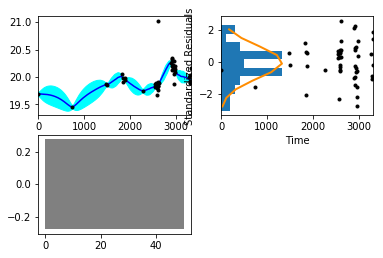

In [5]:
sample.assess_fit()

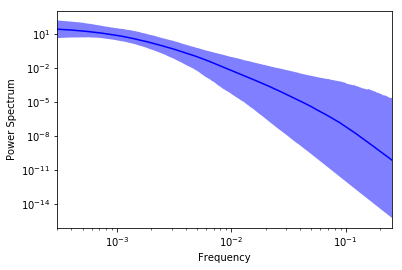

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000376389,0.815765,'Medida del nivel de ruido')

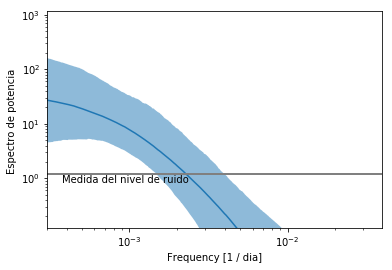

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

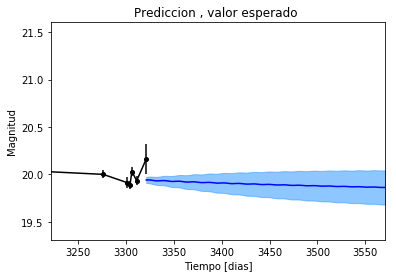

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

Text(0.5,1,'Prediccion, Caminos simulados')

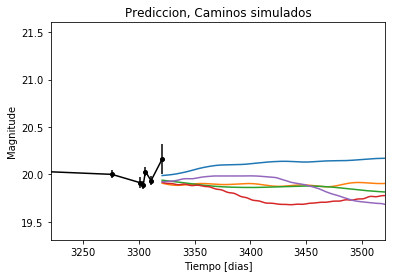

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


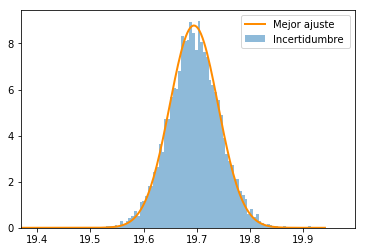

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

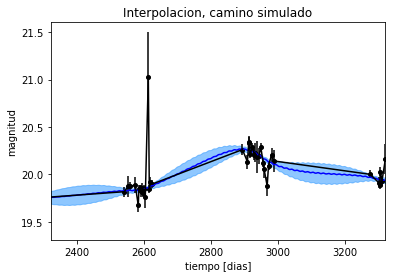

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

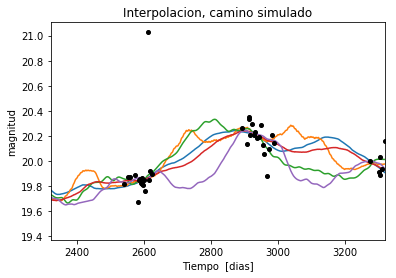

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 369.141892916
Median: 0.00867928159021
Standard deviation: 0.105213645085
68% credibility interval: [ 0.0008863   0.11630592]
95% credibility interval: [  3.66475900e-04   4.21518106e-01]
99% credibility interval: [  3.14318191e-04   4.84122534e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 628.358712705
Median: 0.00171371223241
Standard deviation: 0.0446546930462
68% credibility interval: [ 0.00048305  0.01529714]
95% credibility interval: [ 0.00032512  0.13992868]
99% credibility interval: [  3.05028855e-04   3.50857320e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 909.122285605
Median: 0.0139262063216
Standard

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 2079.80591733
Median: 61.4358547598
Standard deviation: 1.58462443497
68% credibility interval: [ 59.5914531   62.52568897]
95% credibility interval: [ 57.14740136  63.09965523]
99% credibility interval: [ 55.22329031  63.31264577]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 559.538938865
Median: 0.441973152336
Standard deviation: 1.11199602171
68% credibility interval: [ 0.04574635  2.03140485]
95% credibility interval: [ 0.01382871  3.72001878]
99% credibility interval: [ 0.00988138  5.61507366]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 1104.5476224
Median: 0.153182496634
Standard deviation: 2.20991328593
68% credibility interval: [ 0.00895236  2.25921993]
95% credibility interval: [  6.04518805e-04

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1283.0474289
Median: 5.19487985799e-23
Standard deviation: 3.79256161134e+71
68% credibility interval: [  6.31125115e-55   1.32433281e-05]
95% credibility interval: [  6.22939350e-80   5.72500987e+15]
99% credibility interval: [  8.03245217e-88   1.31488207e+68]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2955.44688177
Median: 19.830447051
Standard deviation: 0.127233287386
68% credibility interval: [ 19.71440635  19.92747457]
95% credibility interval: [ 19.55409805  20.05826647]
99% credibility interval: [ 19.38664002  20.17117715]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 1348.13367403
Median: 0.00279366915645
Standard deviation: 0.1211634137
68% credibility interval: [ 0.          0.17602301]
95% credibility interval: [ 0.          0.42955076]
99% credibility interval: [ 0.          0.48879674]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 1348.13367403
Median: 0.00279366915645
Standard deviation: 0.1211634137
68% credibility interval: [ 0.          0.17602301]
95% credibility interval: [ 0.          0.42955076]
99% credibility interval: [ 0.          0.48879674]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1402.5237907
Median: 0.0
Standard deviation: 0.000377916016921
68% credi

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 2079.80591733
Median: 61.4358547598
Standard deviation: 1.58462443497
68% credibility interval: [ 59.5914531   62.52568897]
95% credibility interval: [ 57.14740136  63.09965523]
99% credibility interval: [ 55.22329031  63.31264577]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2780.44342226
Median: 0.0576676968718
Standard deviation: 0.0786404160702
68% credibility interval: [ 0.03463005  0.11250117]
95% credibility interval: [ 0.0232274   0.26251084]
99% credibility interval: [ 0.01786384  0.51889146]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2161.90384262
Median: 1.20728620503
Standard deviation: 0.187884163435
68% credibility interval: [ 1.03520939  1.40669961]
95% credibility interval: [ 0.89943517  1.63682204]
99% credibility interval: [ 0.82003248  1.80770893]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 807.809901149
Median: 5.26298468416e-05
Standard deviation: 0.0131522347435
68% credibility interval: [  1.64409663e-06   1.34871953e-03]
95% credibility interval: [  7.13019584e-21   2.21376083e-02]
99% credibility interval: [  7.34430015e-74   8.27362691e-02]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 369.141892916
Median: (-0.0545335345645-0.0686965118879j)
Standard deviation: 1.00826006475
68% credibility interval: [-0.73077162-0.06089067j -0.00556877-0.58481238j]
95% credibility interval: [ -2.64847637e+00+0.j          -2.30263599e-03-0.00877317j]
99% credibility interval: [ -3.04183159e+00+0.j          -1.97491944e-03-1.44251496j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 628.358712705
Median: (-0.0107675715194+0j)
Standard deviation: 0.811349118368
68% credibility interval: [-0.09611475 +9.97867676e-01j -0.00303508 +7.22512515e-04j]
95% credibility interval: [-0.87919781 +2.22471957e+00j -0.00204277 +1.67041109e-03j]
99% credibility interval: [ -2.20450156e+00+0.50901078j  -1.91655282e-03+0.13063775j]
Pos